In [27]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from netplot import ModelPlot
from tensorflow.keras.utils import plot_model
print(tf.__version__)


2.7.0


In [2]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
# get dummies of the insurance data
insurance_dummies = pd.get_dummies(insurance)
insurance_dummies.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [10]:
# create x & y values (features and labels)
x = insurance_dummies.drop(['charges'], axis=1)
y = insurance_dummies['charges']


In [11]:
x.head() # x values

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [12]:
y.head() # y values

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [14]:
# create training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# output the length of x data vs our x train data and x test data
# these x_train will be used in training only, and x_test will be used to test the neural network
len(x), len(x_train), len(x_test)

(1338, 1070, 268)

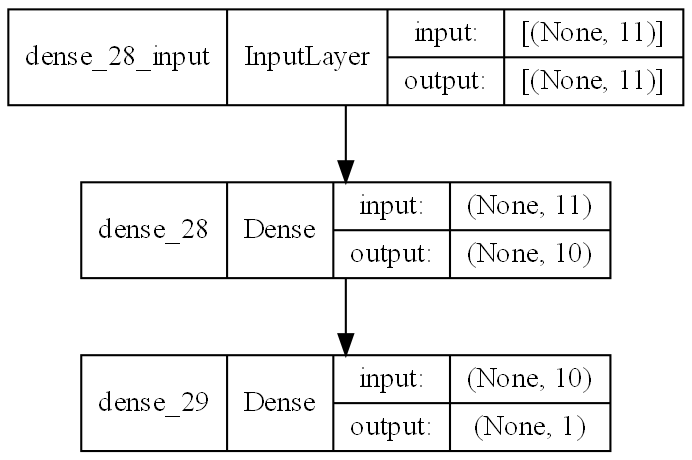

In [41]:
# build a neural network model
tf.random.set_seed(42)

# 1. create a model
insurance_model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(10),
        tf.keras.layers.Dense(1)
    ]
)

# 2. compile the model
insurance_model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
    metrics=['mae']
)

insurance_model.build(input_shape=(None, x.shape[1]))

plot_model(insurance_model, show_shapes=True, expand_nested=True, dpi=150)

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 10)                120       
                                                                 
 dense_29 (Dense)            (None, 1)                 11        
                                                                 
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________
None


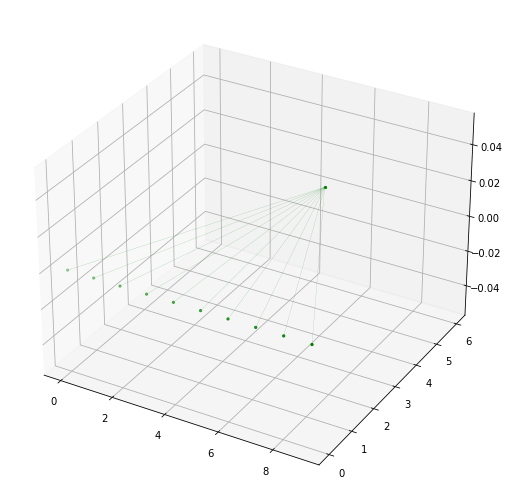

In [42]:
modelplot = ModelPlot(model=insurance_model, grid=True, connection=True, linewidth=0.1)
modelplot.show()

In [43]:
# 3. train the model
insurance_model.fit(
    x_train,
    y_train, 
    epochs=100
)

Epoch 1/200
34/34 [==============================] - 0s 510us/step - loss: 13144.9453 - mae: 13144.9453
Epoch 2/200
34/34 [==============================] - 0s 572us/step - loss: 9795.1201 - mae: 9795.1201
Epoch 3/200
34/34 [==============================] - 0s 681us/step - loss: 7296.1997 - mae: 7296.1997
Epoch 4/200
34/34 [==============================] - 0s 636us/step - loss: 7232.9653 - mae: 7232.9653
Epoch 5/200
34/34 [==============================] - 0s 545us/step - loss: 7167.8286 - mae: 7167.8286
Epoch 6/200
34/34 [==============================] - 0s 582us/step - loss: 7108.8794 - mae: 7108.8794
Epoch 7/200
34/34 [==============================] - 0s 668us/step - loss: 7044.5029 - mae: 7044.5029
Epoch 8/200
34/34 [==============================] - 0s 566us/step - loss: 6985.0742 - mae: 6985.0742
Epoch 9/200
34/34 [==============================] - 0s 555us/step - loss: 6936.8198 - mae: 6936.8198
Epoch 10/200
34/34 [==============================] - 0s 534us/step - loss: 6887

In [34]:
# check the results of the model
insurance_model.evaluate(x_test, y_test)

9/9 [==============================] - 0s 787us/step - loss: 7023.3291 - mae: 7023.3291


[7023.3291015625, 7023.3291015625]

In [37]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

### Improving our model

In [50]:
# set the random seed
tf.random.set_seed(42)

# 1. create a model
insurance_model2 = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(100),
        tf.keras.layers.Dense(10),
        tf.keras.layers.Dense(1)
    ]
)

# 2. compile the model
insurance_model2.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(), # learning_rate=0.001
    metrics=['mae']
)

# 3. train the model
insurance_model2.fit(
    x_train,
    y_train,
    epochs=100,
    verbose=0
)


Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 100)               1200      
                                                                 
 dense_40 (Dense)            (None, 10)                1010      
                                                                 
 dense_41 (Dense)            (None, 1)                 11        
                                                                 
Total params: 2,221
Trainable params: 2,221
Non-trainable params: 0
_________________________________________________________________
None


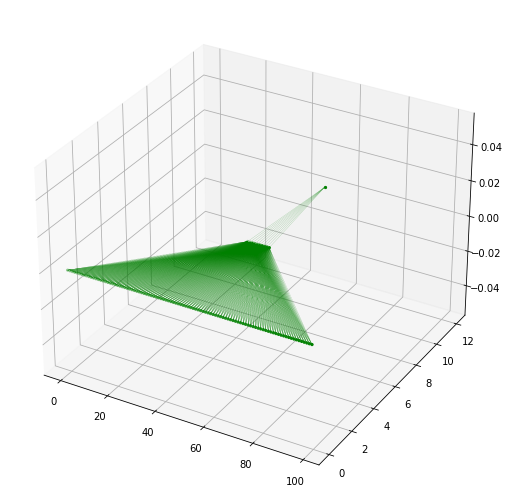

In [51]:
modelplot = ModelPlot(model=insurance_model2, grid=True, connection=True, linewidth=0.1)
modelplot.show()

In [53]:
# Evaluate the model
insurance_model2.evaluate(x_test, y_test)

9/9 [==============================] - 0s 633us/step - loss: 4924.5093 - mae: 4924.5093


[4924.50927734375, 4924.50927734375]

### Insurance Model 3

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_59 (Dense)            (None, 100)               1200      
                                                                 
 dense_60 (Dense)            (None, 10)                1010      
                                                                 
 dense_61 (Dense)            (None, 1)                 11        
                                                                 
Total params: 2,221
Trainable params: 2,221
Non-trainable params: 0
_________________________________________________________________
None


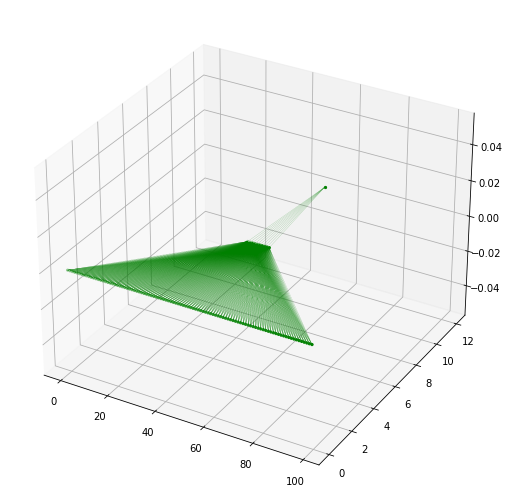

In [90]:
# set the random seed
tf.random.set_seed(42)

# 1. create a model
insurance_model3 = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(100),
        tf.keras.layers.Dense(10),
        tf.keras.layers.Dense(1)
    ]
)

# 2. compile the model
insurance_model3.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), # learning_rate=0.001
    metrics=['mae']
)

insurance_model3.build(input_shape=(None, x.shape[1]))

modelplot = ModelPlot(model=insurance_model3, grid=True, connection=True, linewidth=0.1)
modelplot.show()

In [91]:

# early stopping callback
early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    monitor='mae',
    patience=3
)

# 3. train the model
history = insurance_model3.fit(
    x_train,
    y_train,
    epochs=1000,
    verbose=0,
    callbacks=[early_stopping_callback]
)


In [92]:
# evaluate the model
insurance_model3.evaluate(x_test, y_test)

9/9 [==============================] - 0s 629us/step - loss: 3637.6045 - mae: 3637.6045


[3637.6044921875, 3637.6044921875]

Text(0.5, 0, 'epochs')

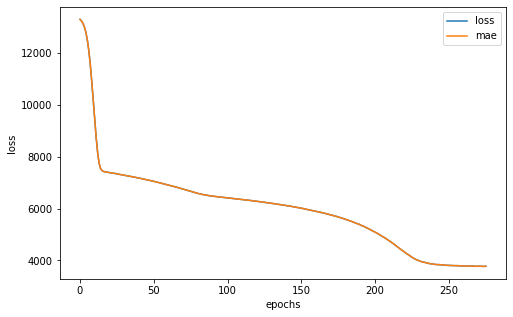

In [93]:
# plot history also known as loss curve
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
# https://youtu.be/tpCFfeUEGs8?list=PLq-a9x-utI1UxV-vgBdzDkJ-gWHJHdybF&t=29474

### CNN Test

In [100]:

# # set the random seed
# tf.random.set_seed(42)

# # https://www.tensorflow.org/tutorials/audio/simple_audio

# # 1. create a model
# insurance_model4 = tf.keras.Sequential(
#     [
#         tf.keras.layers.Input(shape=x.shape[1]),
#         # Downsample the input.
#         tf.keras.layers.Resizing(32, 32),
#         tf.keras.layers.Conv2D(32, 3, activation='relu'),
#         tf.keras.layers.Conv2D(64, 3, activation='relu'),
#         tf.keras.layers.MaxPooling2D(),
#         tf.keras.layers.Dropout(0.25),
#         tf.keras.layers.Flatten(),
#         tf.keras.layers.Dense(128, activation='relu'),
#         tf.keras.layers.Dropout(0.5),
#         tf.keras.layers.Dense(len(insurance_dummies.columns)),
#     ]
# )

# insurance_model4.compile(
#     optimizer=tf.keras.optimizers.Adam(),
#     loss=tf.keras.losses.mae,
#     metrics=['mae'],
# )

ValueError: Exception encountered when calling layer "resizing_3" (type Resizing).

'images' must have either 3 or 4 dimensions.

Call arguments received:
  • inputs=tf.Tensor(shape=(None, 11), dtype=float32)

AttributeError: The layer "resizing_2" has never been called and thus has no defined output shape.

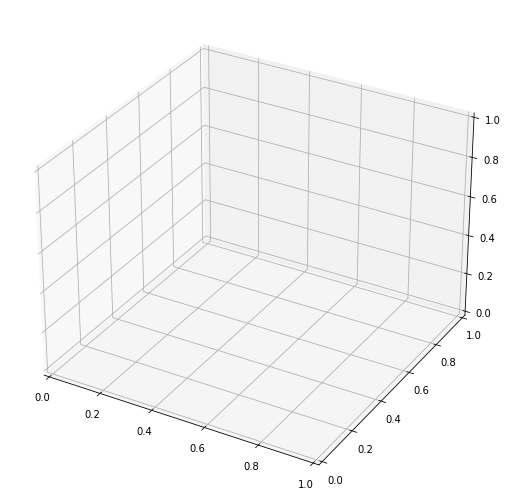

In [99]:
modelplot = ModelPlot(model=insurance_model4, grid=True, connection=True, linewidth=0.1)
modelplot.show()